# Plot the July 2021 Flood Event Hydrographs

This Notebook contains the code to plot the D-HYDRO results of the scenarios for the July 2021 flood event. The plots allow to compare the scenarios and the hydrological models

## Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Locate the results and the observations

In [2]:
HBV_mod = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Base_HBV\dflowfm\output\csv"
Wflow_mod = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Base_Wflow\dflowfm\output\csv"
Observations = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\Observations"

## Create Dataframe containing the locations and the NSE values of the simulation

In [3]:
locations = pd.DataFrame()
locations['id'] = ['M_43035','M_45090','M_42882','M_43197','M_43488','M_43651','M_43047','M_240219']
locations['Station_id'] = ['10Q36','10Q63','11Q32','13Q34','12Q31','10Q30','10Q29','Sippenaeken_Q']
locations['Name'] = ['Meerssen', 'Schin op Geul','Eys (Eyserbeek)','Azijnfabriek (Gulp)','Partij (Selzerbeek)','Hommerich',
                     'Cottessen','Sippenaeken (B)']
locations['NSE_HBV'] = ['--','--','--',0.26,'--','--','--',0.87]
locations['NSE_Wflow'] = ['--','--','--',0.84,'--','--','--',0.86]

## Plot the base models

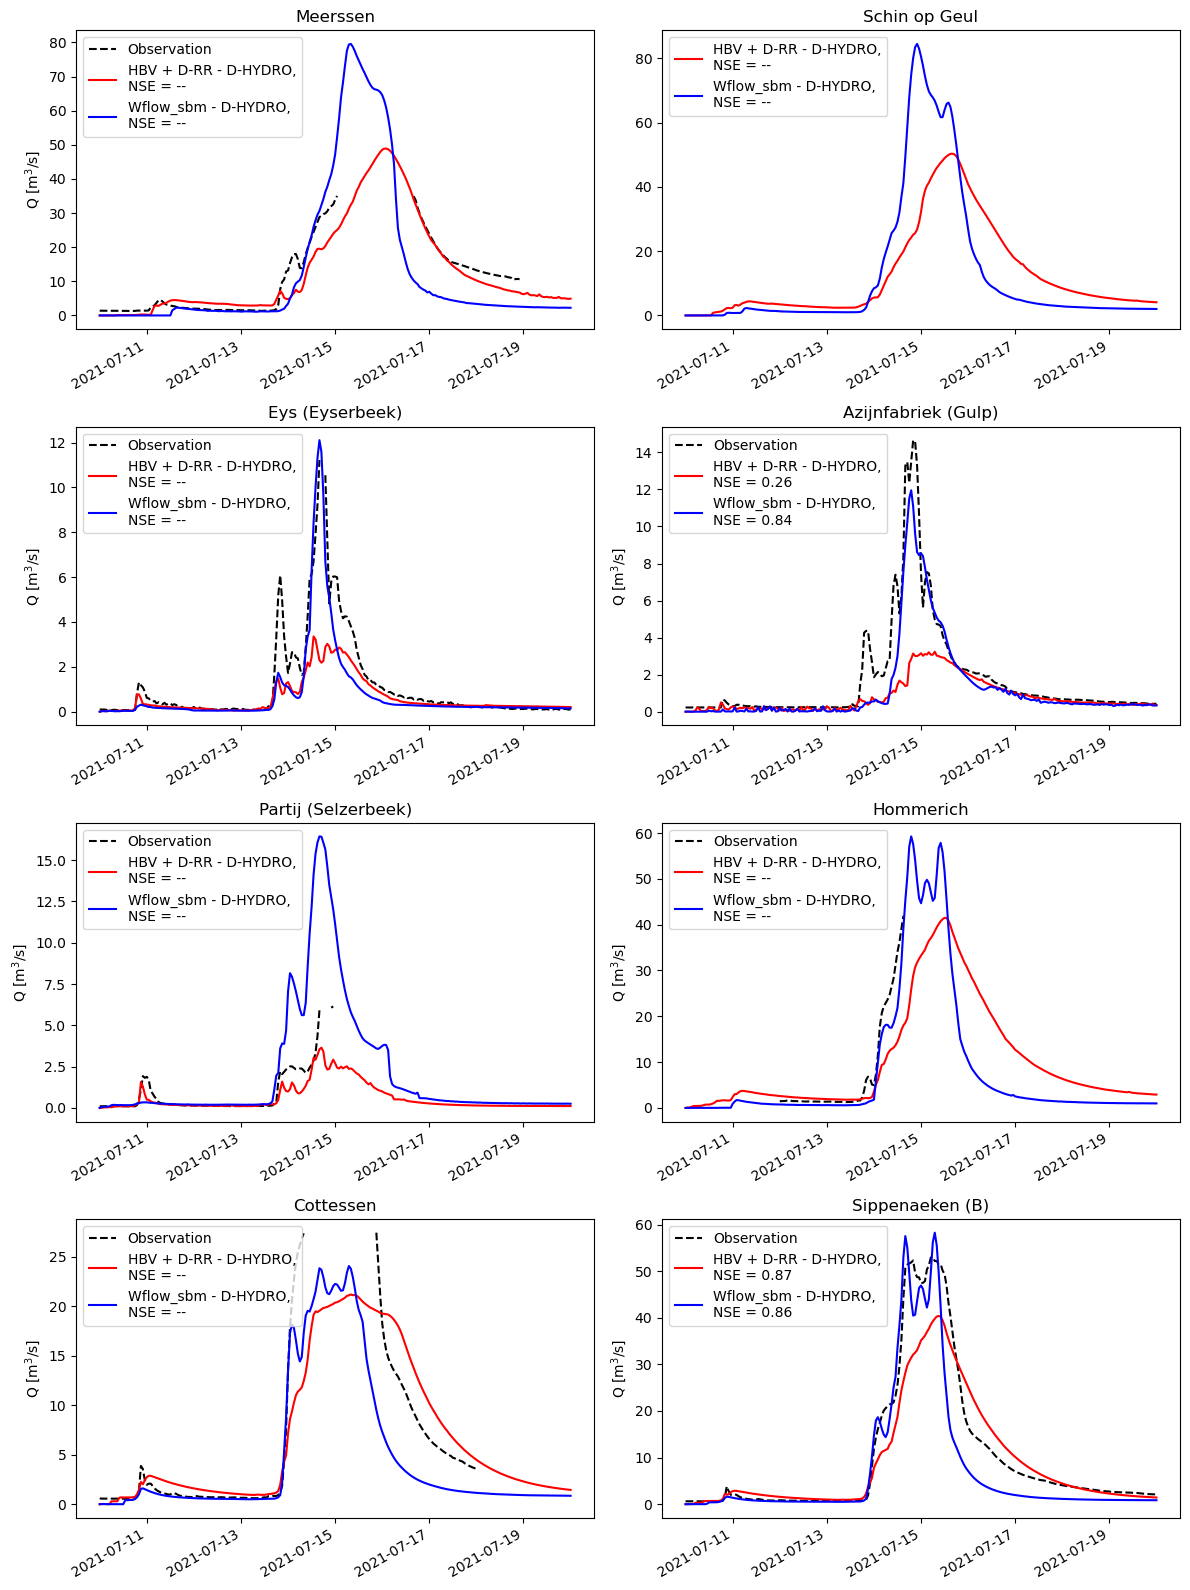

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Observation = os.path.join(Observations, locations.Station_id[i] + '.csv')
    
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Obs = pd.read_csv(Observation, index_col=[0], parse_dates=[0])
    
    try:
        Obs.loc[H.index]
        ax.plot(Obs.loc[H.index], label = 'Observation', color='black',linestyle='--')
        ax.plot(H.index, H.discharge_magnitude, label=f'HBV + D-RR - D-HYDRO,\n'
        f'NSE = {locations.NSE_HBV[i]}', color='red')
        ax.plot(W.index, W.discharge_magnitude, label=f'Wflow_sbm - D-HYDRO,\n'
        f'NSE = {locations.NSE_Wflow[i]}', color='blue') 
    except KeyError as e:
        ax.plot(H.index, H.discharge_magnitude, label=f'HBV + D-RR - D-HYDRO,\n'
        f'NSE = {locations.NSE_HBV[i]}', color='red')
        ax.plot(W.index, W.discharge_magnitude, label=f'Wflow_sbm - D-HYDRO,\n'
        f'NSE = {locations.NSE_Wflow[i]}', color='blue') 
        ax.legend(loc='upper left')
        ax.set_title(locations.Name[i])
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        continue
        
    ax.legend(loc='upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

## Plot Scenario 1a

### Locate the results

In [5]:
HBV_mod2a = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario2a\Scenario2a_HBV\dflowfm\output\csv"
Wflow_mod2a = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario2a\Scenario2a_Wflow\dflowfm\output\csv"

### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 1a
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
80.53 m3/s
2021-07-15 07:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
49.74 m3/s
2021-07-16 00:00:00
Scenario 1a
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
85.9 m3/s
2021-07-14 22:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
51.32 m3/s
2021-07-15 14:00:00
Scenario 1a
Wflow base Eys (Eyserbeek)
12.11 m3/s
2021-07-14 16:00:00
Wflow scenario Eys (Eyserbeek)
12.13 m3/s
2021-07-14 16:00:00
HBV base Eys (Eyserbeek)
3.35 m3/s
2021-07-14 13:00:00
HBV scenario Eys (Eyserbeek)
3.36 m3/s
2021-07-14 13:00:00
Scenario 1a
Wflow base Azijnfabriek (Gulp)
11.95 m3/s
2021-07-14 19:00:00
Wflow scenario Azijnfabriek (Gulp)
12.3 m3/s
2021-07-14 19:00:00
HBV base Azijnfabriek (Gulp)
3.24 m3/s
2021-07-15 07:00:00
HBV scenario Azijnfabriek (Gulp)
3.82 m3/s
2021-07-14 17:00:00
Scenario 1a
Wflow base Partij (Sel

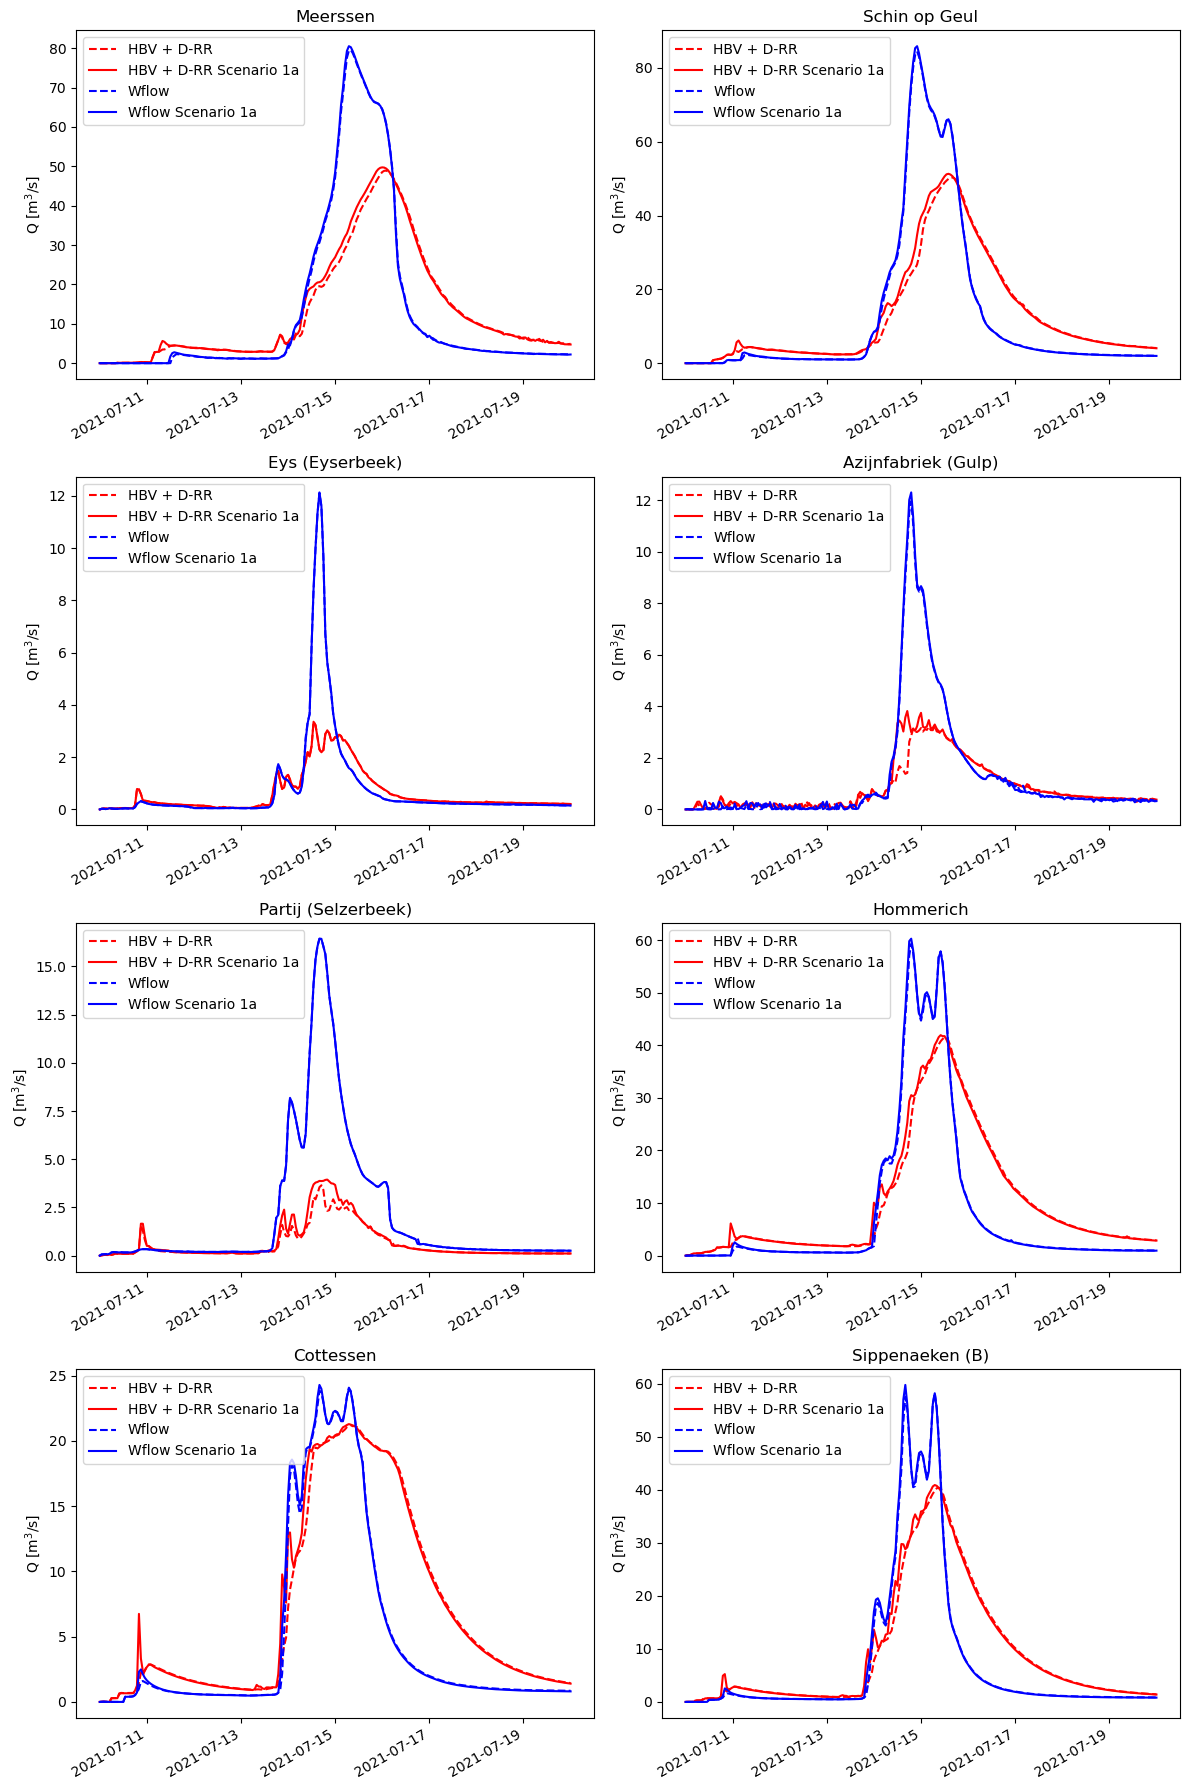

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod2a, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod2a, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 1a')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 1a',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 1a',color='blue')
    ax.legend(loc = 'upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

## Plot Scenario 1b

### Locate the results

In [7]:
HBV_mod2b = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario2b\Scenario2b_HBV\dflowfm\output\csv"
Wflow_mod2b = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario2b\Scenario2b_Wflow\dflowfm\output\csv"

### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 1a
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
86.55 m3/s
2021-07-15 01:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
86.39 m3/s
2021-07-15 01:00:00
Scenario 1a
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
108.13 m3/s
2021-07-14 19:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
107.03 m3/s
2021-07-14 19:00:00
Scenario 1a
Wflow base Eys (Eyserbeek)
12.11 m3/s
2021-07-14 16:00:00
Wflow scenario Eys (Eyserbeek)
12.17 m3/s
2021-07-14 16:00:00
HBV base Eys (Eyserbeek)
3.35 m3/s
2021-07-14 13:00:00
HBV scenario Eys (Eyserbeek)
3.35 m3/s
2021-07-14 13:00:00
Scenario 1a
Wflow base Azijnfabriek (Gulp)
11.95 m3/s
2021-07-14 19:00:00
Wflow scenario Azijnfabriek (Gulp)
18.41 m3/s
2021-07-14 17:00:00
HBV base Azijnfabriek (Gulp)
3.24 m3/s
2021-07-15 07:00:00
HBV scenario Azijnfabriek (Gulp)
3.23 m3/s
2021-07-15 07:00:00
Scenario 1a
Wflow base Partij 

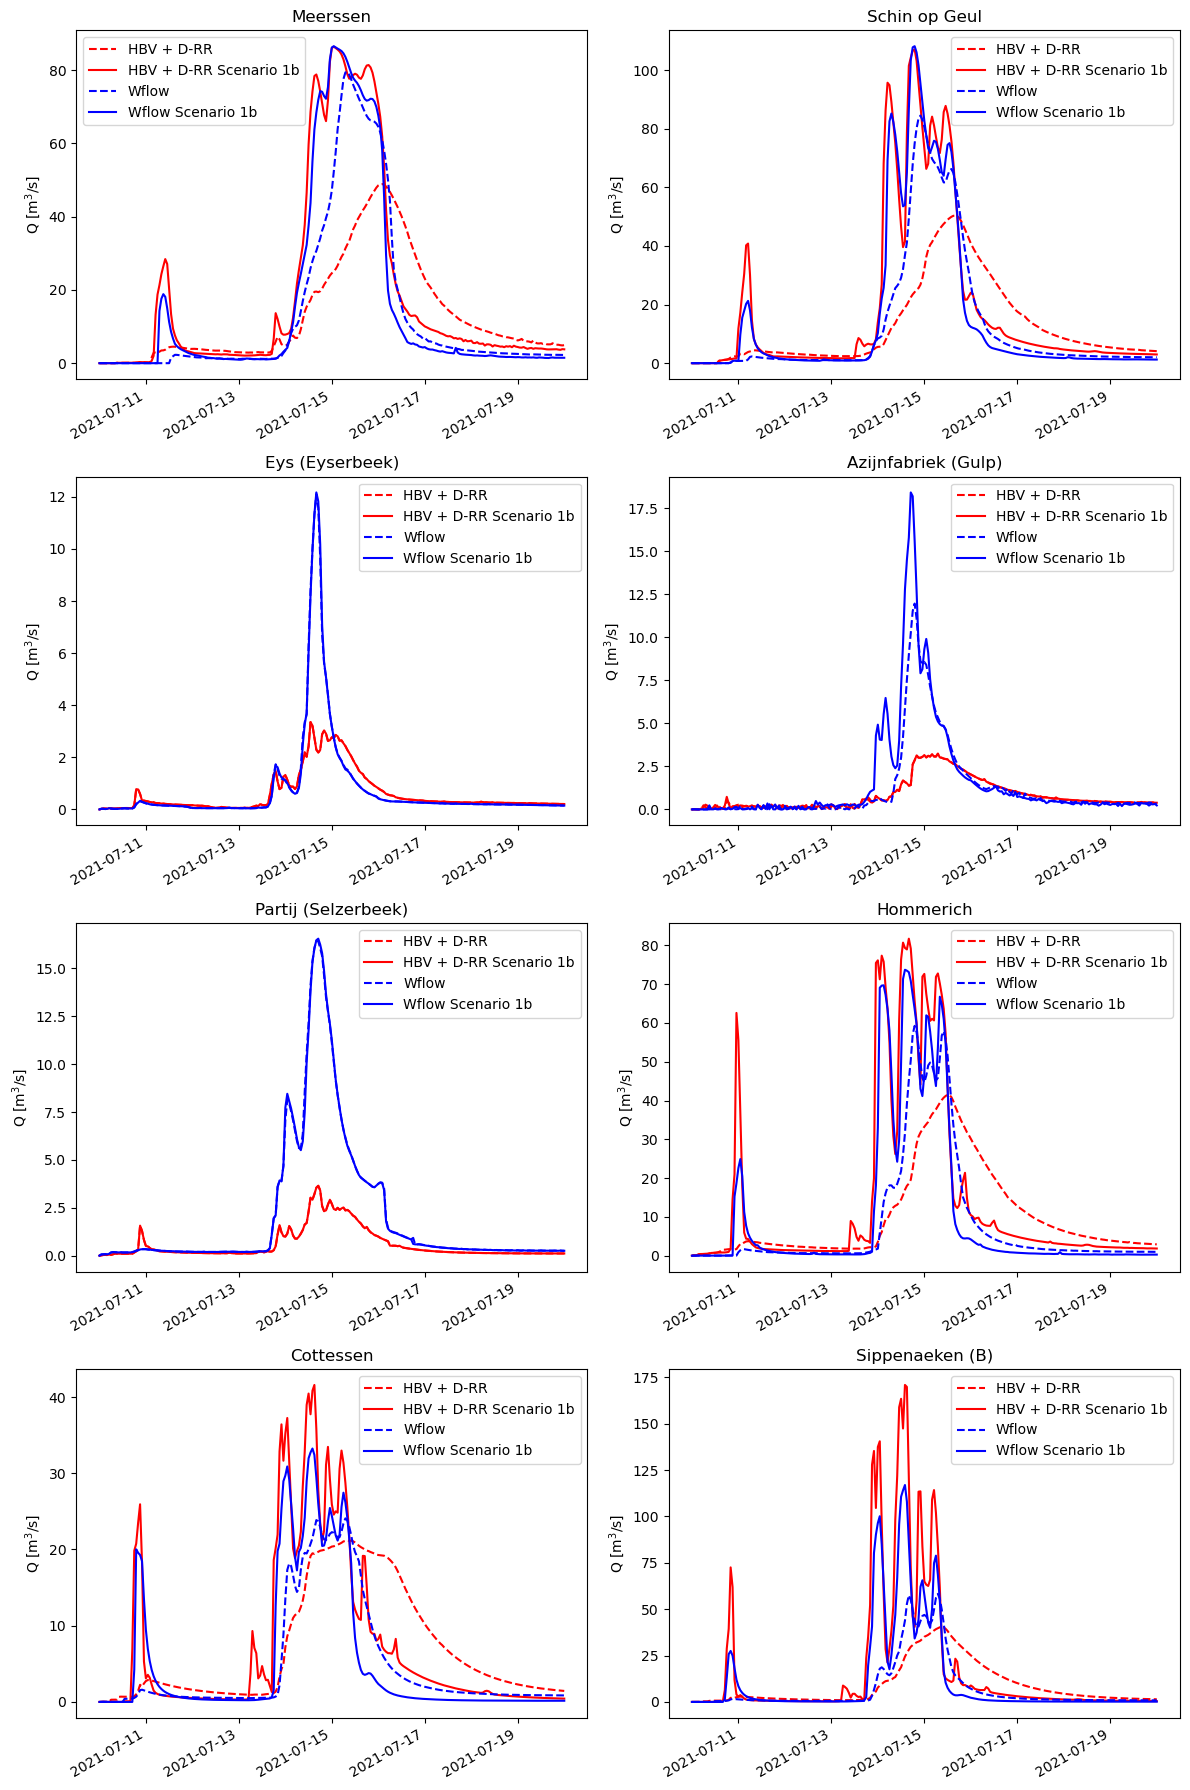

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod2b, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod2b, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 1a')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 1b',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 1b',color='blue')
    ax.legend(loc='best')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

## Scenario 2a

### Define the necessary locations for scenario 2a

In [41]:
locations = pd.DataFrame()
locations['id'] = ['M_43035','M_45090']
locations['Station_id'] = ['10Q36','10Q63']
locations['Name'] = ['Meerssen', 'Schin op Geul']

### Plot Scenario 2a1

#### Locate the results

In [42]:
HBV_mod3a1 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a1\Scenario3a1_HBV\dflowfm\output\csv"
Wflow_mod3a1 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a1\Scenario3a1_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2a1
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
79.74 m3/s
2021-07-15 08:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
49.1 m3/s
2021-07-16 02:00:00
Scenario 2a1
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
84.63 m3/s
2021-07-14 22:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
50.26 m3/s
2021-07-15 16:00:00


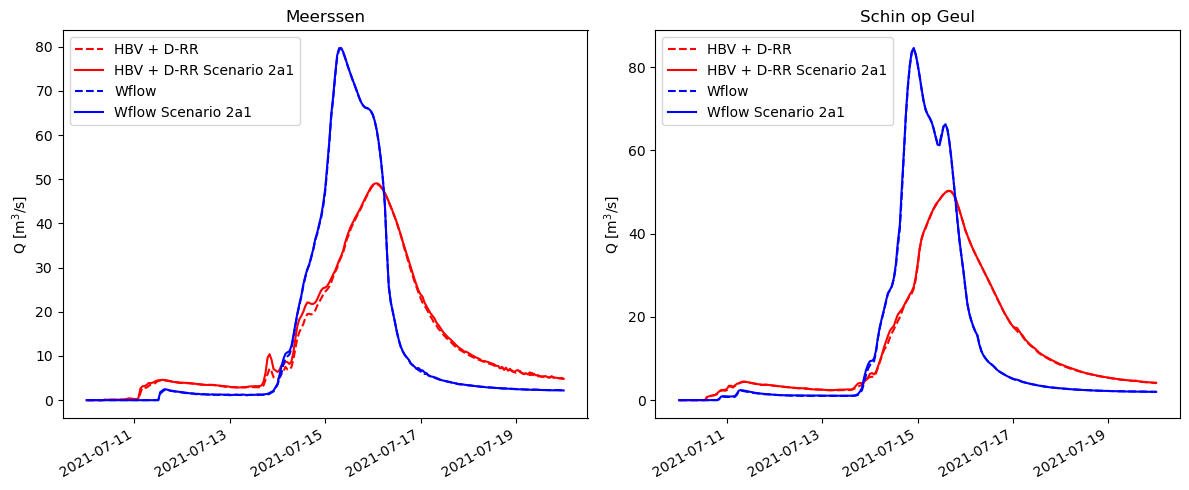

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3a1, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3a1, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 2a1')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 2a1',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 2a1',color='blue')
    ax.legend(loc='upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2a2

#### Locate the results

In [44]:
HBV_mod3a2 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a2\Scenario3a2_HBV\dflowfm\output\csv"
Wflow_mod3a2 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a2\Scenario3a2_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2a2
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
79.78 m3/s
2021-07-15 07:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
48.86 m3/s
2021-07-16 02:00:00
Scenario 2a2
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
84.26 m3/s
2021-07-14 22:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
50.11 m3/s
2021-07-15 15:00:00


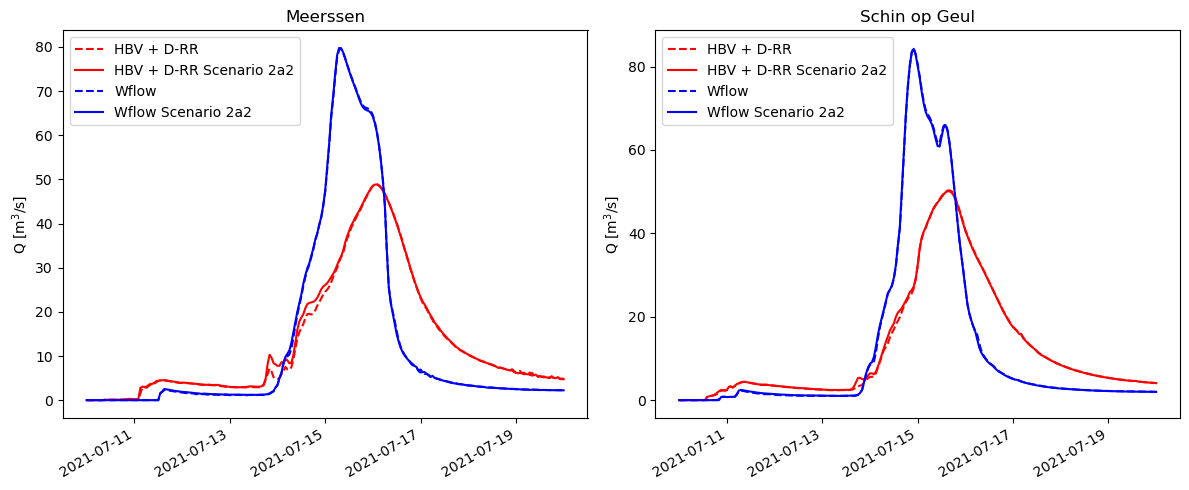

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3a2, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3a2, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 2a2')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 2a2',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 2a2',color='blue')
    ax.legend(loc = 'upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2a1 vs Scenario 2a2

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Wflow 2a1 Meerssen
79.74 m3/s
2021-07-15 08:00:00
Wflow 2a2 Meerssen
79.78 m3/s
2021-07-15 07:00:00
HBV 2a1 Meerssen
49.1 m3/s
2021-07-16 02:00:00
HBV 2a2 Meerssen
48.86 m3/s
2021-07-16 02:00:00
Wflow 2a1 Schin op Geul
84.63 m3/s
2021-07-14 22:00:00
Wflow 2a2 Schin op Geul
84.26 m3/s
2021-07-14 22:00:00
HBV 2a1 Schin op Geul
50.26 m3/s
2021-07-15 16:00:00
HBV 2a2 Schin op Geul
50.11 m3/s
2021-07-15 15:00:00


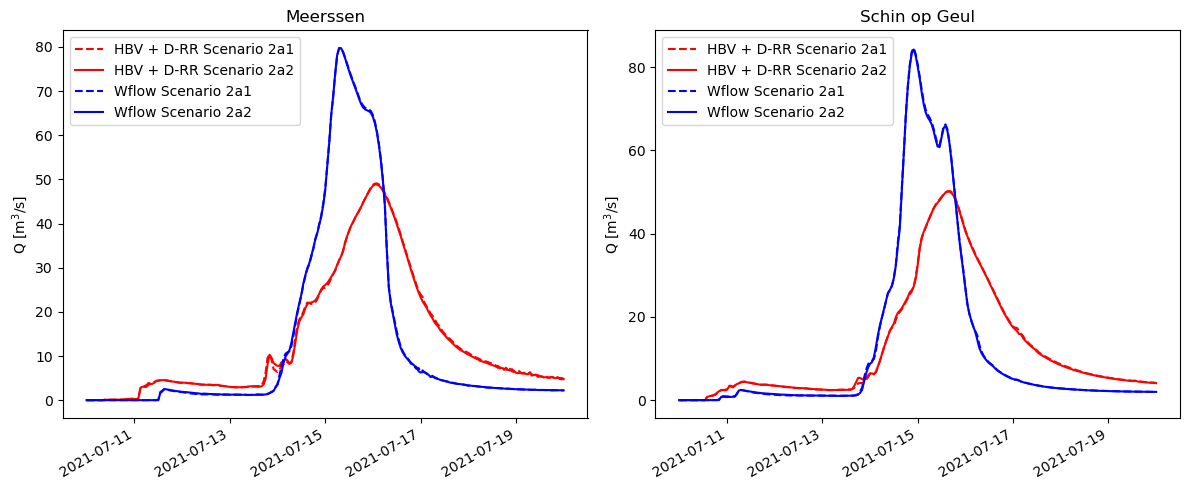

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod3a1, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3a2, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod3a1, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3a2, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Wflow 2a1 {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow 2a2 {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV 2a1 {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV 2a2 {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR Scenario 2a1',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 2a2',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow Scenario 2a1',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 2a2',color='blue')
    ax.legend(loc='upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2a3

#### Locate the results

In [47]:
HBV_mod3a3 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a3\Scenario3a3_HBV\dflowfm\output\csv"
Wflow_mod3a3 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3a3\Scenario3a3_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2a3
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
82.25 m3/s
2021-07-15 05:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
54.57 m3/s
2021-07-14 18:00:00
Scenario 2a3
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
86.03 m3/s
2021-07-14 20:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
51.14 m3/s
2021-07-15 15:00:00


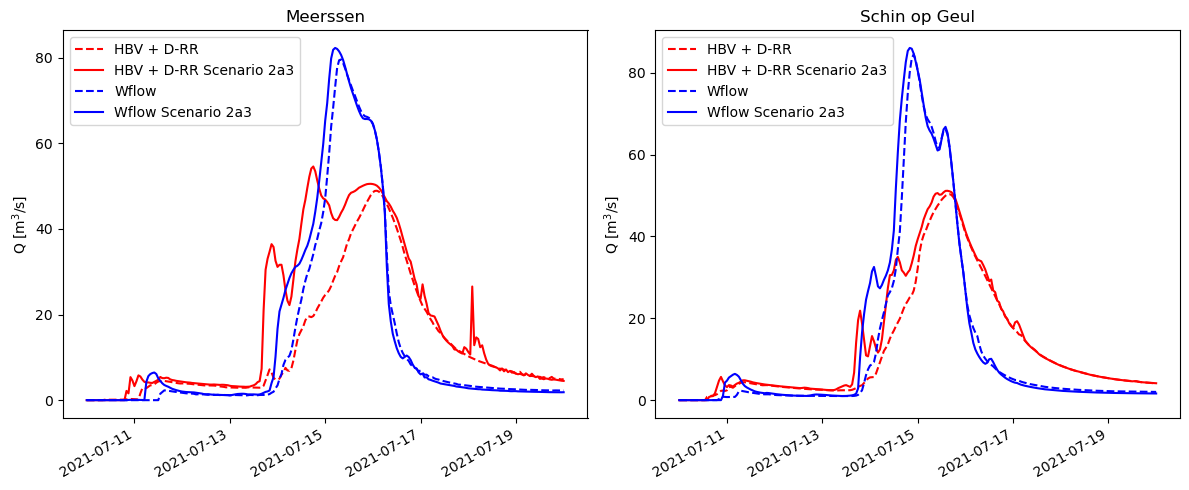

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3a3, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3a3, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 2a3')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR Scenario 2a3',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow Scenario 2a3',color='blue')
    ax.legend(loc = 'upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

## Scenario 2b

### Define the necessary locations for scenario 2a

In [49]:
locations = pd.DataFrame()
locations['id'] = ['M_43035','M_45090','M_43197']
locations['Station_id'] = ['10Q36','10Q63','13Q34']
locations['Name'] = ['Meerssen', 'Schin op Geul','Azijnfabriek (Gulp)']

### Plot Scenario 2b1

#### Locate the results

In [50]:
HBV_mod3e1 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e1\Scenario3e1_HBV\dflowfm\output\csv"
Wflow_mod3e1 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e1\Scenario3e1_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2b1
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
79.99 m3/s
2021-07-15 07:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
49.25 m3/s
2021-07-16 01:00:00
Scenario 2b1
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
85.05 m3/s
2021-07-14 22:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
50.47 m3/s
2021-07-15 14:00:00
Scenario 2b1
Wflow base Azijnfabriek (Gulp)
11.95 m3/s
2021-07-14 19:00:00
Wflow scenario Azijnfabriek (Gulp)
12.44 m3/s
2021-07-14 19:00:00
HBV base Azijnfabriek (Gulp)
3.24 m3/s
2021-07-15 07:00:00
HBV scenario Azijnfabriek (Gulp)
8.28 m3/s
2021-07-14 13:00:00


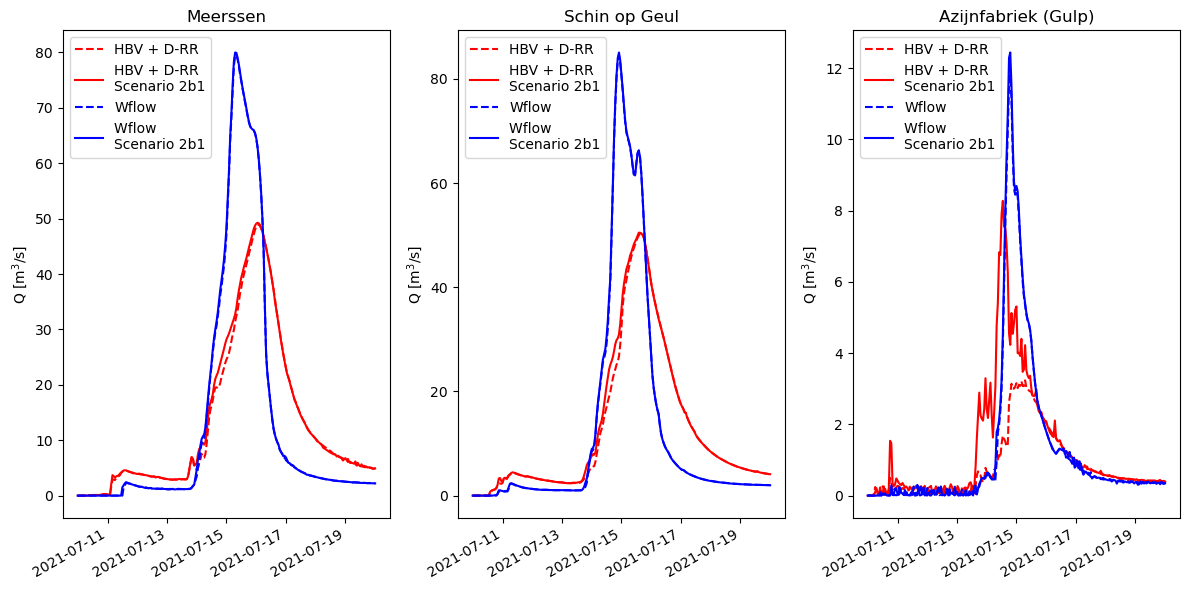

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3e1, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3e1, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])

    print(f'Scenario 2b1')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())
    
    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR \n' 'Scenario 2b1',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow \n' 'Scenario 2b1',color='blue')
    ax.legend(loc = 'upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2b2

#### Locate the results

In [52]:
HBV_mod3e2 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e2\Scenario3e2_HBV\dflowfm\output\csv"
Wflow_mod3e2 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e2\Scenario3e2_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2b2
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
79.79 m3/s
2021-07-15 07:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
48.88 m3/s
2021-07-16 01:00:00
Scenario 2b2
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
84.64 m3/s
2021-07-14 22:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
50.12 m3/s
2021-07-15 16:00:00
Scenario 2b2
Wflow base Azijnfabriek (Gulp)
11.95 m3/s
2021-07-14 19:00:00
Wflow scenario Azijnfabriek (Gulp)
11.98 m3/s
2021-07-14 19:00:00
HBV base Azijnfabriek (Gulp)
3.24 m3/s
2021-07-15 07:00:00
HBV scenario Azijnfabriek (Gulp)
7.17 m3/s
2021-07-14 13:00:00


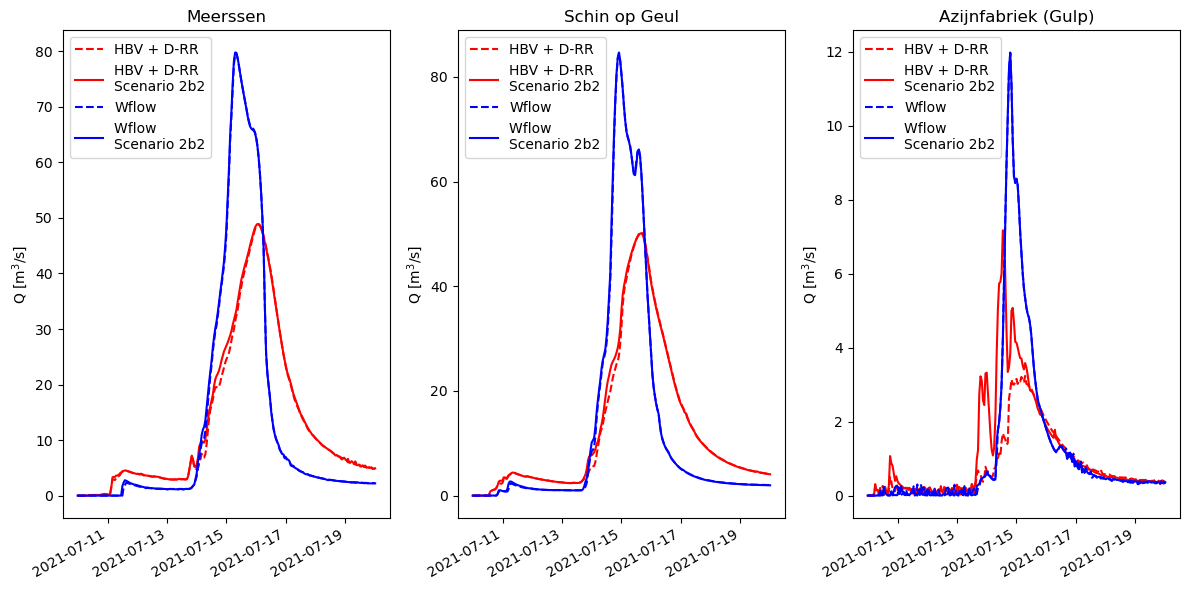

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3e2, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3e2, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 2b2')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR \n' 'Scenario 2b2',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow \n' 'Scenario 2b2',color='blue')
    ax.legend(loc='upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2b1 vs Scenario 2b2

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Wflow 2b1 Meerssen
79.99 m3/s
2021-07-15 07:00:00
Wflow 2b2 Meerssen
79.79 m3/s
2021-07-15 07:00:00
HBV 2b1 Meerssen
49.25 m3/s
2021-07-16 01:00:00
HBV 2b2 Meerssen
48.88 m3/s
2021-07-16 01:00:00
Wflow 2b1 Schin op Geul
85.05 m3/s
2021-07-14 22:00:00
Wflow 2b2 Schin op Geul
84.64 m3/s
2021-07-14 22:00:00
HBV 2b1 Schin op Geul
50.47 m3/s
2021-07-15 14:00:00
HBV 2b2 Schin op Geul
50.12 m3/s
2021-07-15 16:00:00
Wflow 2b1 Azijnfabriek (Gulp)
12.44 m3/s
2021-07-14 19:00:00
Wflow 2b2 Azijnfabriek (Gulp)
11.98 m3/s
2021-07-14 19:00:00
HBV 2b1 Azijnfabriek (Gulp)
8.28 m3/s
2021-07-14 13:00:00
HBV 2b2 Azijnfabriek (Gulp)
7.17 m3/s
2021-07-14 13:00:00


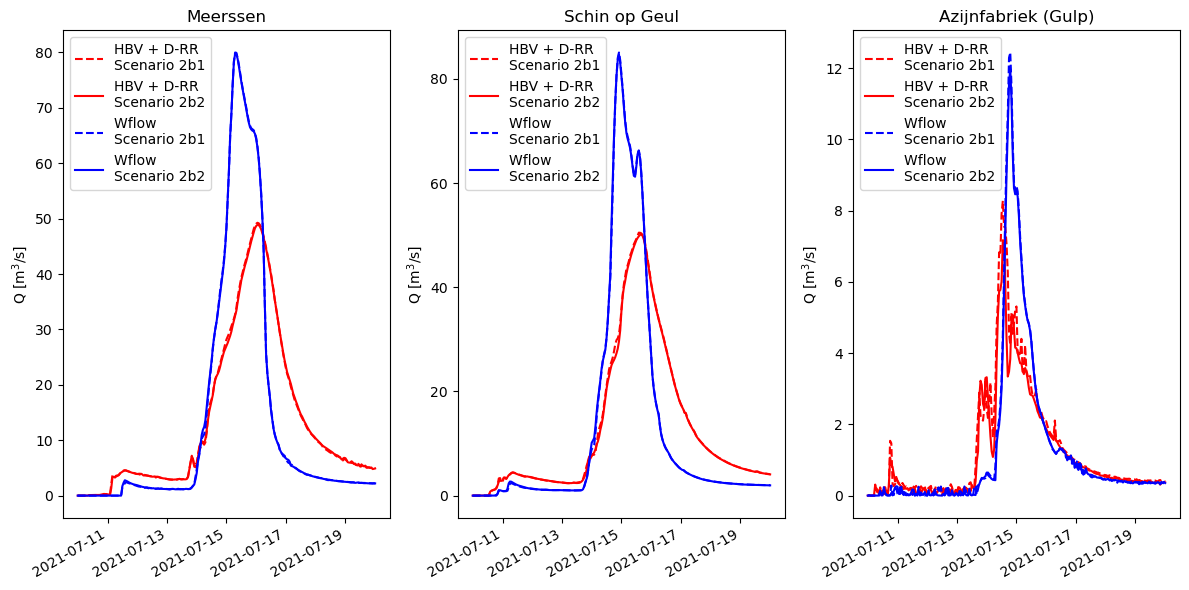

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod3e1, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3e2, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod3e1, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3e2, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Wflow 2b1 {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow 2b2 {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV 2b1 {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV 2b2 {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR \n' 'Scenario 2b1',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR \n' 'Scenario 2b2',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow \n' 'Scenario 2b1',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow \n' 'Scenario 2b2',color='blue')
    ax.legend(loc = 'upper left')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()

### Plot Scenario 2b3

#### Locate the results

In [57]:
HBV_mod3e3 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e3\Scenario3e3_HBV\dflowfm\output\csv"
Wflow_mod3e3 = "C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\D-HYDRO\July2021\Scenario3e3\Scenario3e3_Wflow\dflowfm\output\csv"

#### Plot the hydrographs and print the peak discharge information

Next to the hydrographs, the magnitude of the peak discharge of the hydrological model is printed and the time when this peak discharge happens.

Scenario 2b3
Wflow base Meerssen
79.56 m3/s
2021-07-15 08:00:00
Wflow scenario Meerssen
82.52 m3/s
2021-07-15 06:00:00
HBV base Meerssen
48.91 m3/s
2021-07-16 02:00:00
HBV scenario Meerssen
60.24 m3/s
2021-07-15 05:00:00
Scenario 2b3
Wflow base Schin op Geul
84.47 m3/s
2021-07-14 22:00:00
Wflow scenario Schin op Geul
87.35 m3/s
2021-07-14 21:00:00
HBV base Schin op Geul
50.32 m3/s
2021-07-15 16:00:00
HBV scenario Schin op Geul
69.32 m3/s
2021-07-14 18:00:00
Scenario 2b3
Wflow base Azijnfabriek (Gulp)
11.95 m3/s
2021-07-14 19:00:00
Wflow scenario Azijnfabriek (Gulp)
17.91 m3/s
2021-07-14 17:00:00
HBV base Azijnfabriek (Gulp)
3.24 m3/s
2021-07-15 07:00:00
HBV scenario Azijnfabriek (Gulp)
54.91 m3/s
2021-07-14 16:00:00


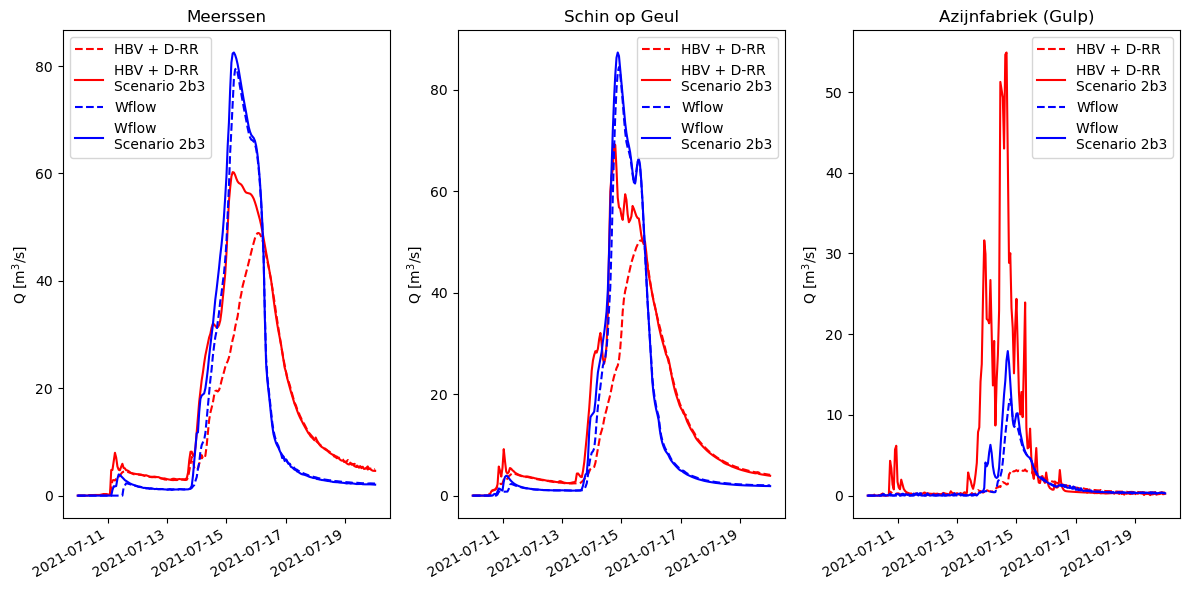

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    HBV = os.path.join(HBV_mod, locations.id[i] + '_simulated.csv')
    Scen_H = os.path.join(HBV_mod3e3, locations.id[i] + '_simulated.csv')
    
    Wflow = os.path.join(Wflow_mod, locations.id[i] + '_simulated.csv')
    Scen_W = os.path.join(Wflow_mod3e3, locations.id[i] + '_simulated.csv')

    W = pd.read_csv(Wflow, index_col=[0], parse_dates=[0])
    Ws = pd.read_csv(Scen_W, index_col=[0], parse_dates=[0])
    H = pd.read_csv(HBV, index_col=[0], parse_dates=[0])
    Hs = pd.read_csv(Scen_H, index_col=[0], parse_dates=[0])
    
    print(f'Scenario 2b3')
    print(f'Wflow base {locations.Name[i]}')
    print(f'{round(W.discharge_magnitude.max(),2)} m3/s')
    print(W.discharge_magnitude.idxmax())
    print(f'Wflow scenario {locations.Name[i]}')
    print(f'{round(Ws.discharge_magnitude.max(),2)} m3/s')
    print(Ws.discharge_magnitude.idxmax())
    
    print(f'HBV base {locations.Name[i]}')
    print(f'{round(H.discharge_magnitude.max(),2)} m3/s')
    print(H.discharge_magnitude.idxmax())
    print(f'HBV scenario {locations.Name[i]}')
    print(f'{round(Hs.discharge_magnitude.max(),2)} m3/s')
    print(Hs.discharge_magnitude.idxmax())

    ax.plot(H.index, H.discharge_magnitude, '--', label='HBV + D-RR',color='red')
    ax.plot(Hs.index, Hs.discharge_magnitude, label='HBV + D-RR \n' 'Scenario 2b3',color='red')
    ax.plot(W.index, W.discharge_magnitude, '--', label='Wflow',color='blue')
    ax.plot(Ws.index, Ws.discharge_magnitude, label='Wflow \n' 'Scenario 2b3',color='blue')
    ax.legend(loc='best')
    ax.set_title(locations.Name[i])
    ax.set_ylabel('Q [m$^3$/s]')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.tight_layout()
plt.show()